In [21]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import os

In [17]:
# motion sense
# trainPath = '/Users/kaikaneshina/Documents/MATH178/project_data/motionSense/train_set.csv'
# savePath = '/Users/kaikaneshina/Documents/MATH178/project_data/motionSense'

In [25]:
# UCI HAR
trainPath = '/Users/kaikaneshina/Documents/MATH178/project_data/UCI HAR dataset/allData.csv'
savePath = '/Users/kaikaneshina/Documents/MATH178/project_data/UCI HAR dataset'

In [38]:
allData = pd.read_csv(trainPath)
# for UCI
allData = allData.rename(columns= {'users':'user'})

In [39]:
activities = allData.activity.unique()
d = {'dws': 'Walking Down Stairs', 'ups':'Walking Up Stairs', 
     'wlk': 'Walking', 'jog': 'Jogging', 'sit': 'Sitting', 'std': 'Standing', 'lay': 'Laying Down'}

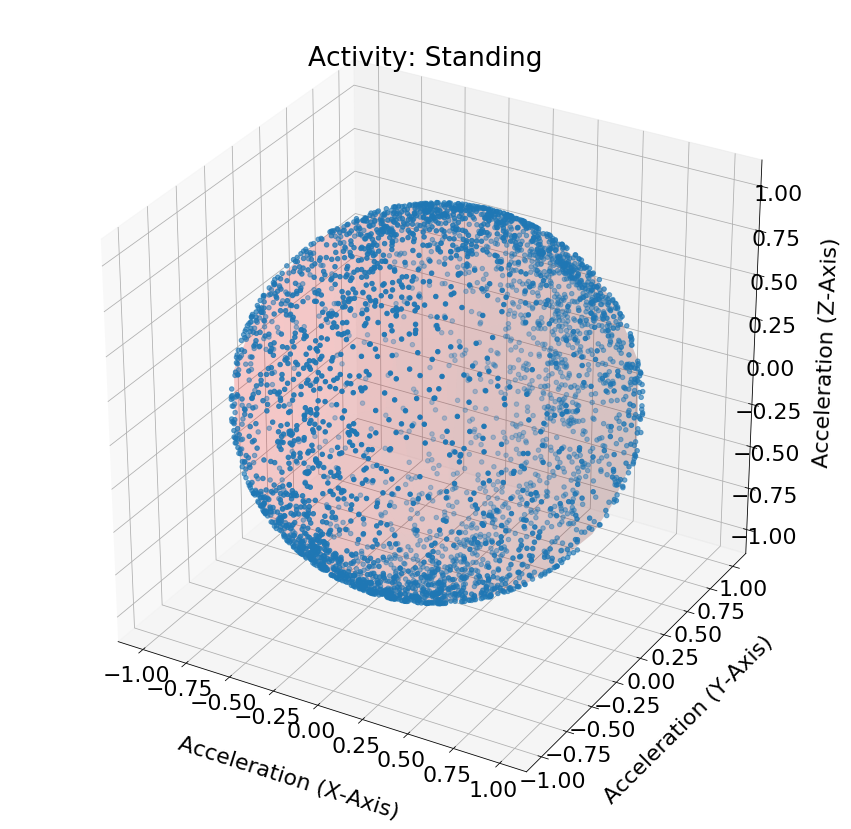

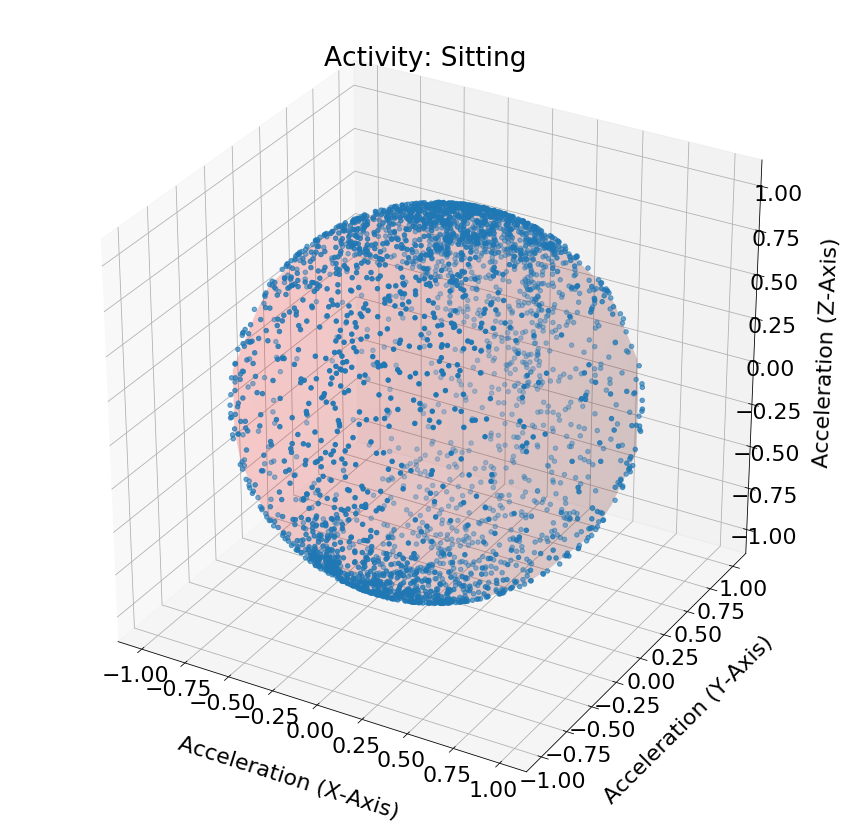

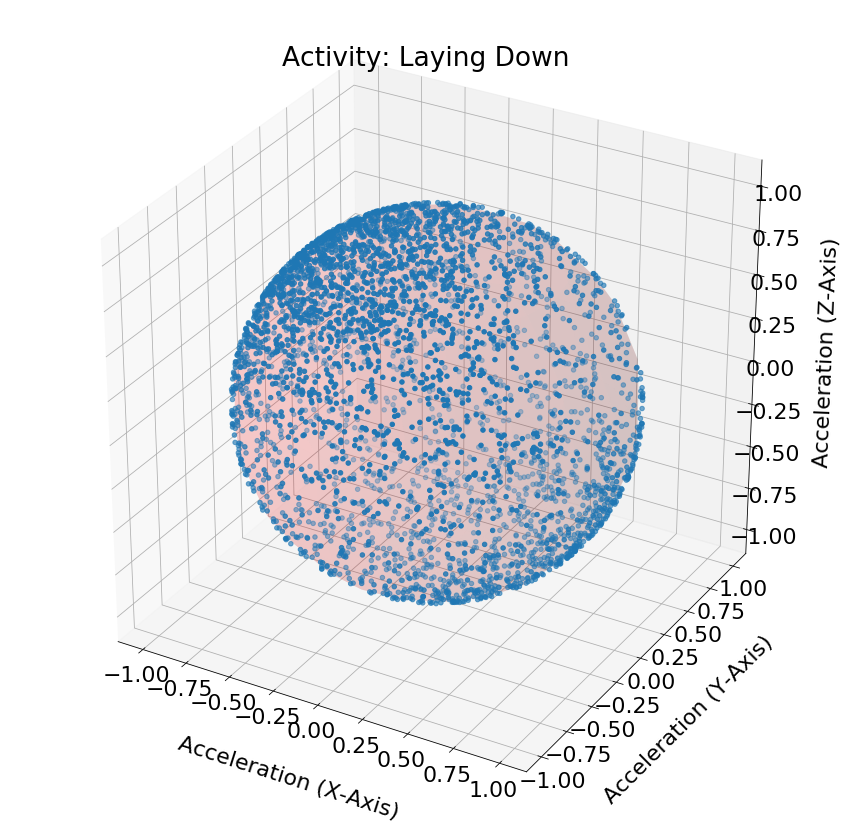

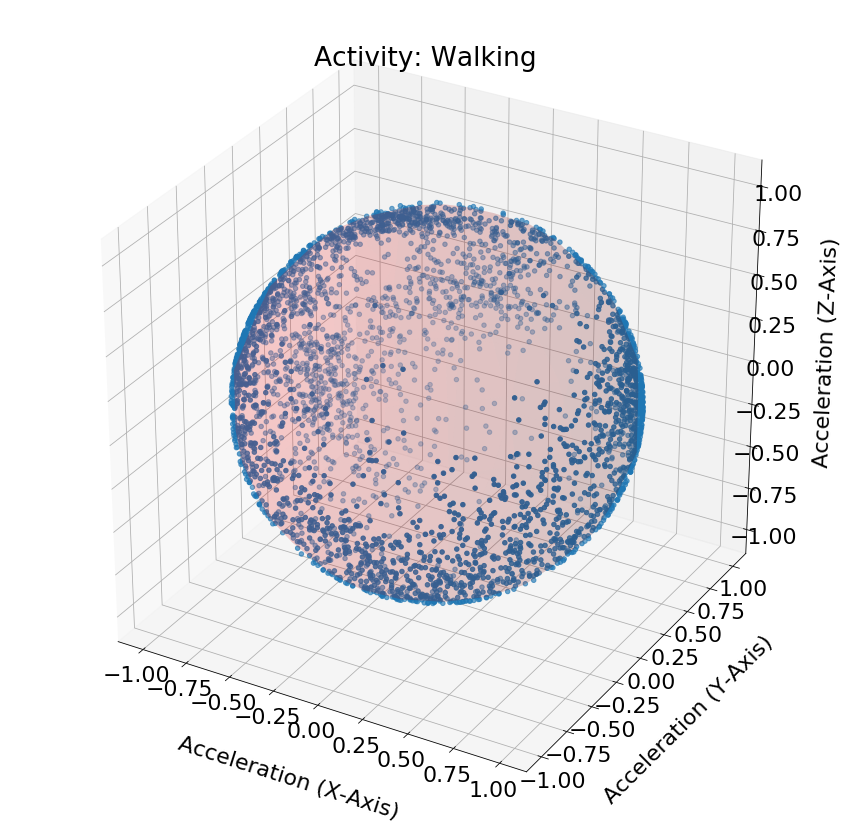

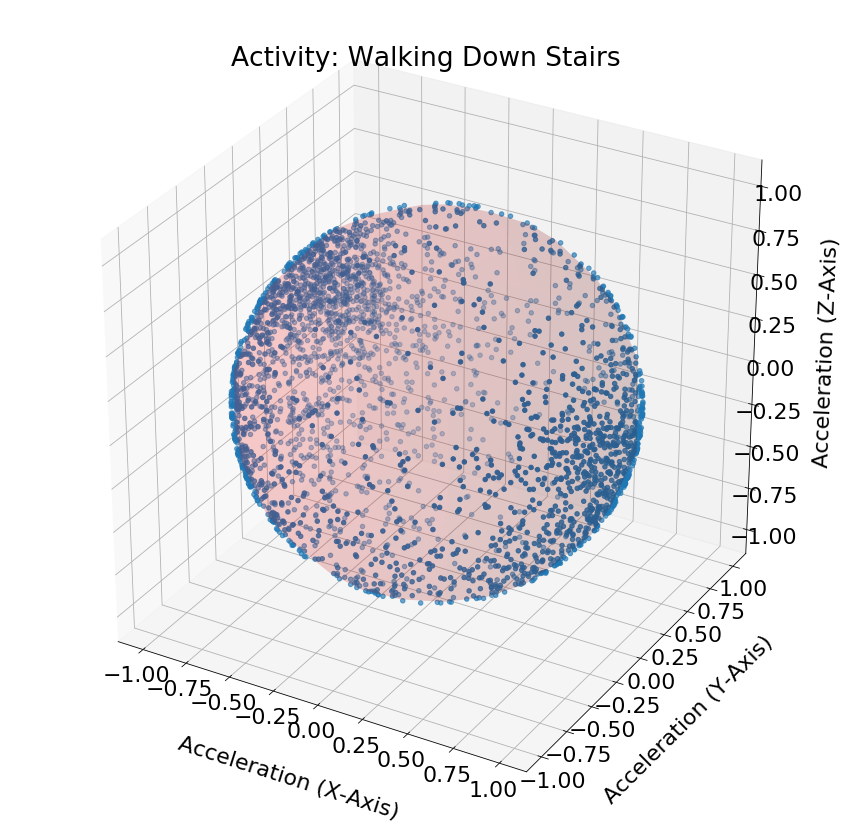

In [ ]:
plt.rcParams.update({'font.size': 22})
user = 3
data = allData[allData['user']==user]
for act in activities:
    df = data[data['activity'] == act]
    if df.shape[0] > 0:
        vector = df[['a_x','a_y','a_z']]
        theta = vector.apply(lambda x: x/np.linalg.norm(x), axis = 1)
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(111,  projection='3d')

        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y, z, color="r", alpha = .1)

        u = theta['a_x'].values#[::10]
        v = theta['a_y'].values#[::10]
        w = theta['a_z'].values#[::10]

        ax.scatter(u, v, w)
        
        act = d[act]
        
        ax.set_title('Activity: ' + act)        
        ax.set_ylabel('Acceleration (Y-Axis)', labelpad=30)
        ax.set_zlabel('Acceleration (Z-Axis)', labelpad=30)
        ax.set_xlabel('Acceleration (X-Axis)', labelpad=30)
#         plt.savefig(os.path.join(savePath, act + '_user_' + str(user) + '.png'))